In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.23:8786,Workers: 0
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,Total threads: 0
Started: 5 hours ago,Total memory: 0 B


In [3]:
samples = [
   
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_20p0mm",
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_96p0mm",
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_100GeV_5p0GeV_400mm"
    
    #"2Mu2E_500GeV_5p0GeV_8p0mm",
    #"2Mu2E_500GeV_5p0GeV_40p0mm",
    
    #"4Mu_500GeV_5p0GeV_0p08mm",
    #"4Mu_500GeV_5p0GeV_0p8mm",
    #"4Mu_500GeV_5p0GeV_40p0mm",
    #"4Mu_500GeV_5p0GeV_80p0mm",
    #"4Mu_500GeV_5p0GeV_8p0mm",

    
  
    
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                max_files =10
                                 #max_files =1
                                )

channels = [
      "baseNoLj" ,"base_egmLj_eLj"
]

p = sidm_processor.SidmProcessor(
    channels,
    ["egm_lj_base" ],
    #lj_reco_choices=["0.4"],
   
)
runner = processor.Runner(
    executor=processor.FuturesExecutor(),
     # executor=processor.IterativeExecutor(),
     # executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    #skipbadfiles=True,
    savemetrics=True,
)
output = runner.run(fileset, treename="Events", processor_instance=p)

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [4]:

def plot_histograms(samples, hist_list, channel, n, log = False):
    for h in range(len(histograms_list)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:], density=True)
                plt.legend(samples)
                ax[0].set_title(channel)
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:], density=True)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channel)
def plot_channels(samples, channels, histogram, n , log=False):
    for h in range(len(channels)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                ax[0].set_title(channels[h])
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channels[h])
def eta_phi(samples, channel):
    fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

    plt.subplot(1, 2, 1)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_eta"), )
        plt.yscale("log") 
        plt.legend(samples)
        plt.title(channel)
    plt.subplot(1, 2, 2)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_phi"), )
        plt.yscale("log")
        plt.legend(samples)
        plt.title(channel)
    

In this section I will plot the properties of the egm_Ljs


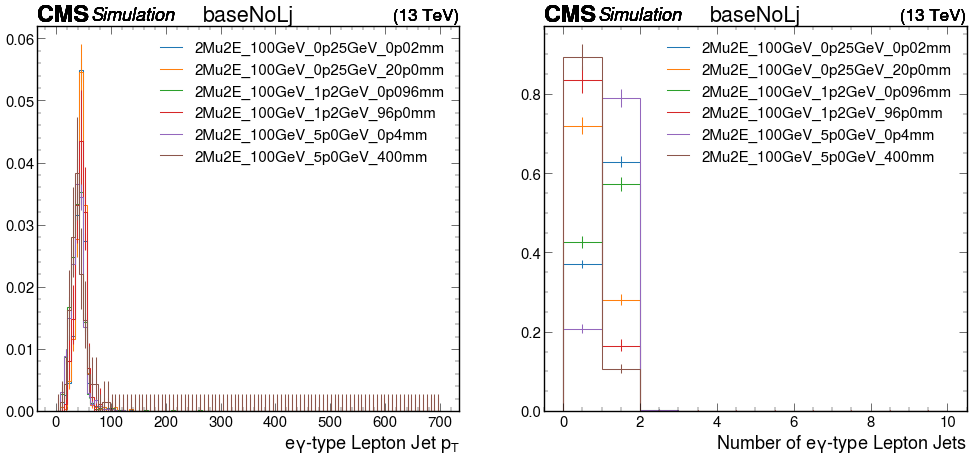

In [5]:
histograms_list = ["egm_lj_pt", "egm_lj_n"]
plot_histograms(samples, histograms_list, "baseNoLj", 2)

Here look a the number of electrons and photons in egm type LJs

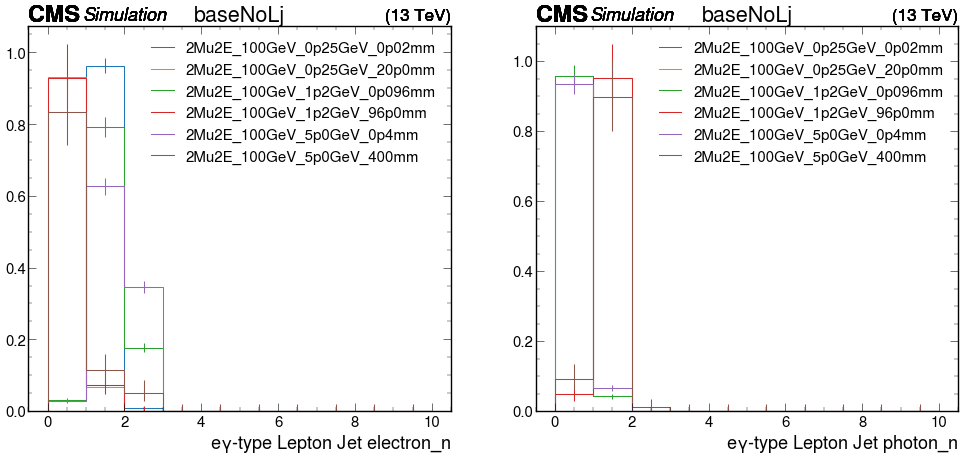

In [6]:
histograms_list = [ "egm_lj_electronN", "egm_lj_photonN",]
plot_histograms(samples, histograms_list, "baseNoLj", 2)


Here we look at the pT values for all photons and electrons

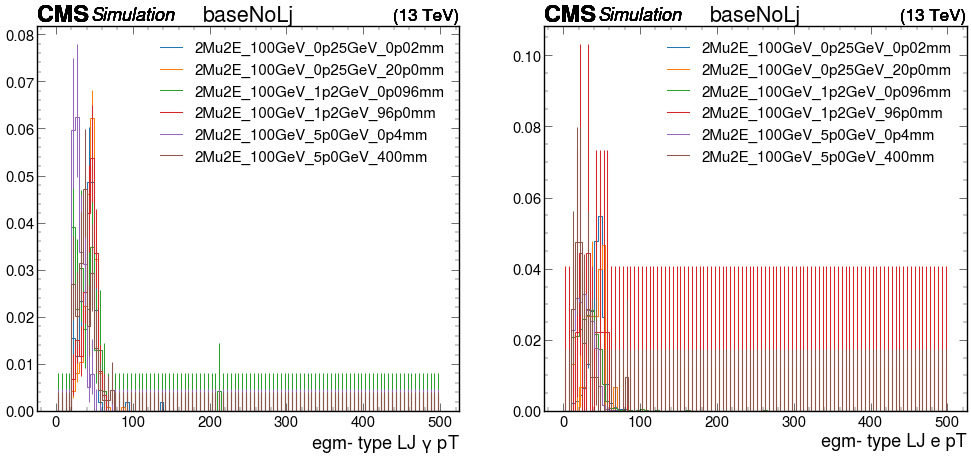

In [7]:
histograms_list = [  "egm_lj_photon_pt", "egm_lj_electron_pt",]
plot_histograms(samples, histograms_list, "baseNoLj",2)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

Here we look at the dxy values for all muons, PF muons and DSA muons

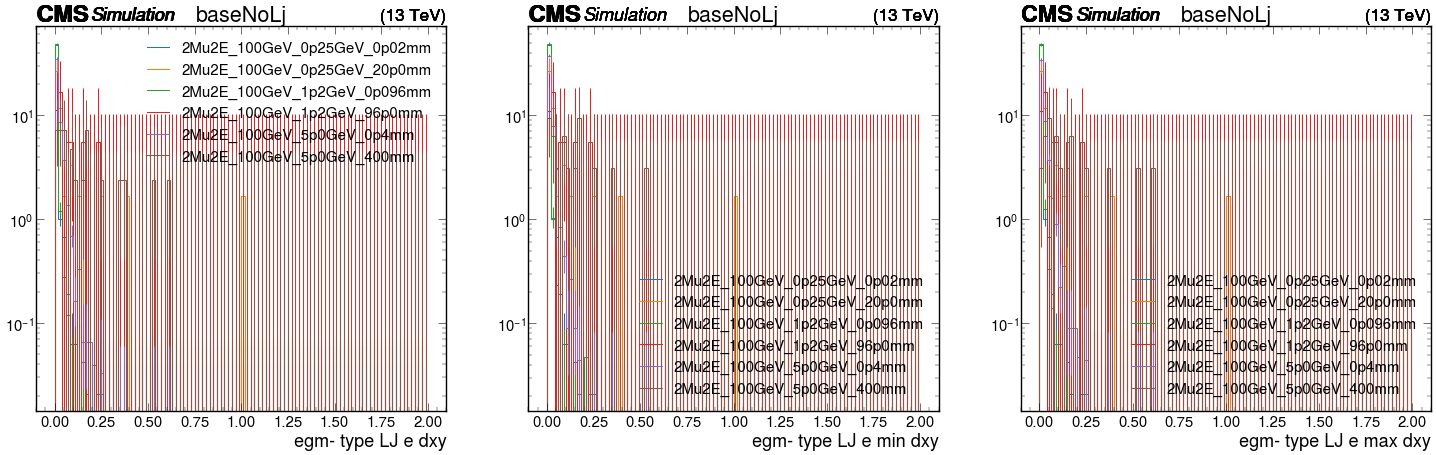

In [8]:
histograms_list = [  "egm_lj_electron_dxy", "egm_lj_electron_min_dxy","egm_lj_electron_max_dxy", ]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

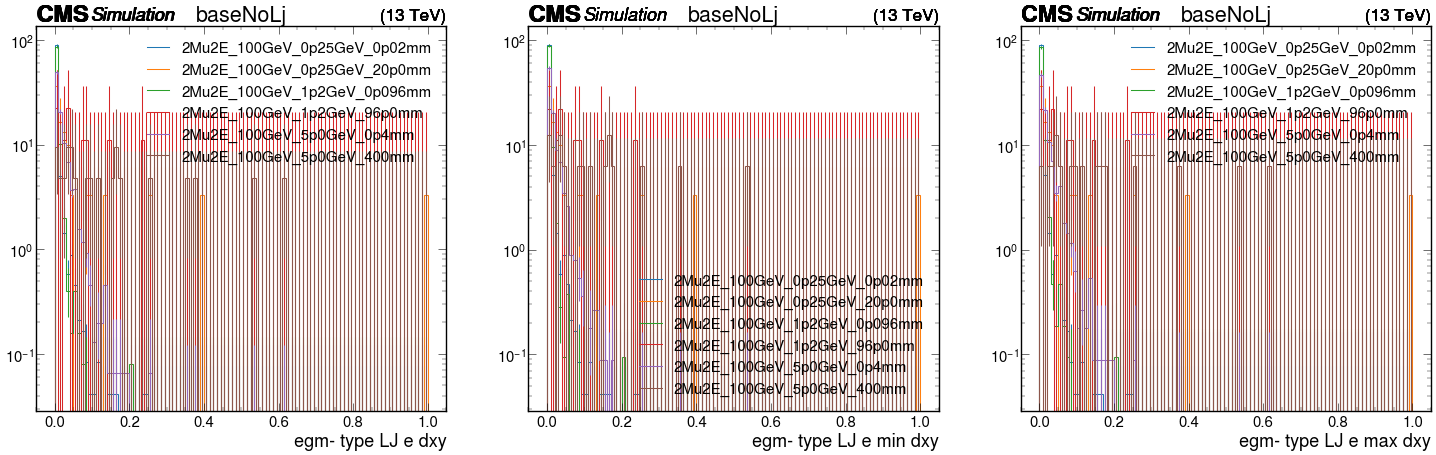

In [9]:
histograms_list = [  "egm_lj_electron_dxy_lowRange", "egm_lj_electron_min_dxy_lowRange","egm_lj_electron_max_dxy_lowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

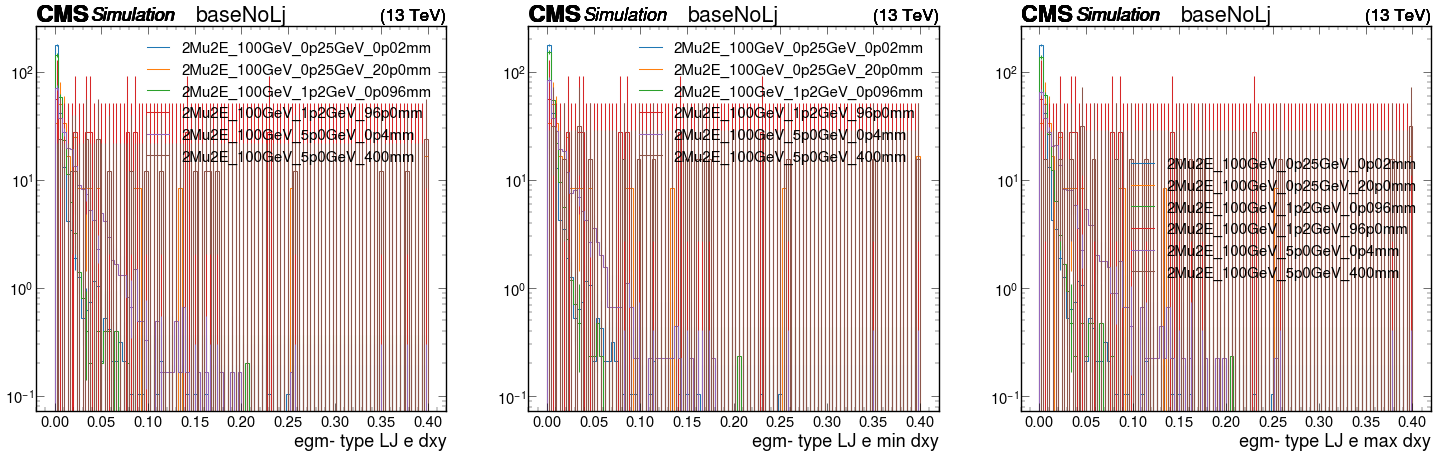

In [10]:
histograms_list = [  "egm_lj_electron_dxy_XLowRange", "egm_lj_electron_min_dxy_XLowRange","egm_lj_electron_max_dxy_XLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples, histograms_list, "base", 3, log=False)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

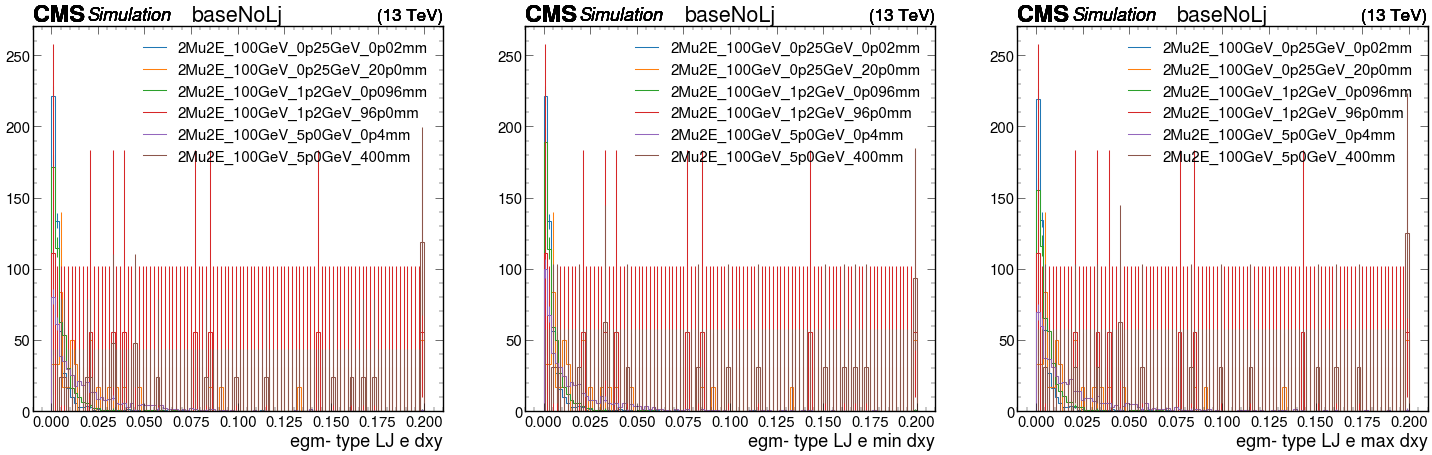

In [11]:
histograms_list = [  "egm_lj_electron_dxy_XXLowRange", "egm_lj_electron_min_dxy_XXLowRange","egm_lj_electron_max_dxy_XXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, )
#plot_histograms(samples, histograms_list, "base_ljObjCut", 3,)
# plot_histograms(samples, histograms_list, "base", 3, )
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

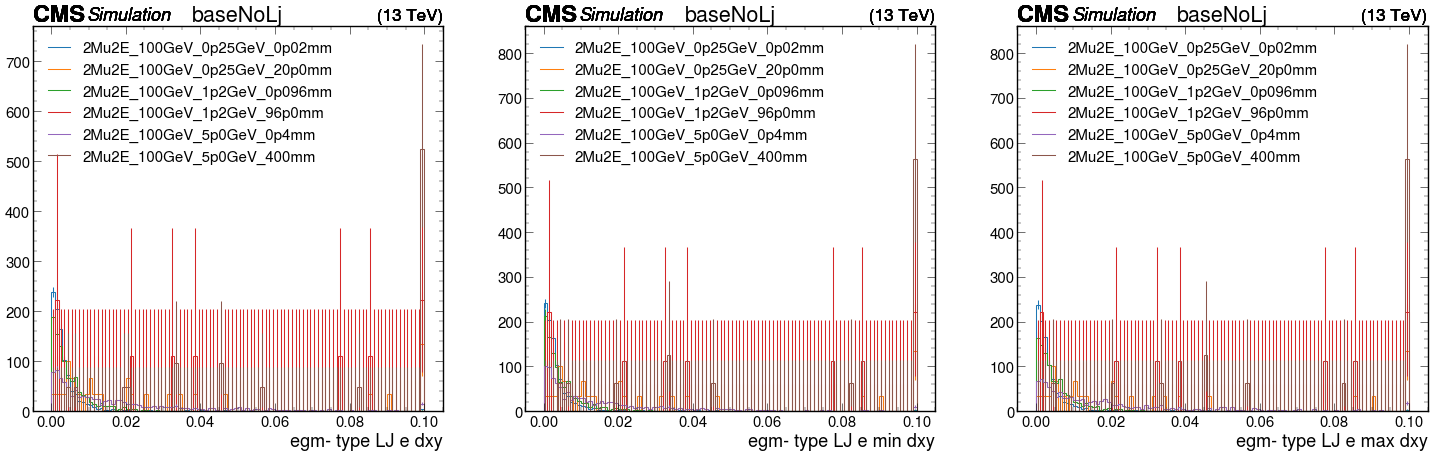

In [12]:
histograms_list = [  "egm_lj_electron_dxy_XXXLowRange", "egm_lj_electron_min_dxy_XXXLowRange","egm_lj_electron_max_dxy_XXXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3,)
#plot_histograms(samples, histograms_list, "base_ljObjCut", 3, )
#plot_histograms(samples, histograms_list, "base", 3,)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

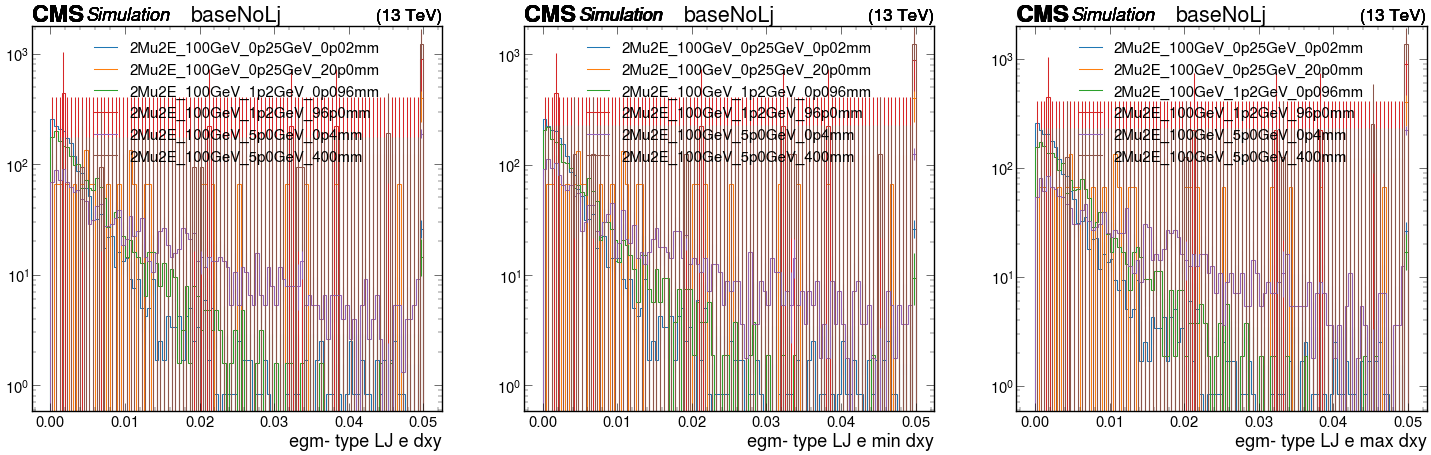

In [13]:
histograms_list = [  "egm_lj_electron_dxy_XXXXLowRange", "egm_lj_electron_min_dxy_XXXXLowRange","egm_lj_electron_max_dxy_XXXXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples, histograms_list, "base_ljObjCut", 3, log=True)
#plot_histograms(samples, histograms_list, "base", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

<bound method BaseHist.integrate of Hist(Regular(100, 0, 0.1, name='egm- type LJ e dxy'), storage=Weight()) # Sum: WeightedSum(value=0.0539938, variance=0.00026503) (WeightedSum(value=0.103079, variance=0.000505966) with flow)>

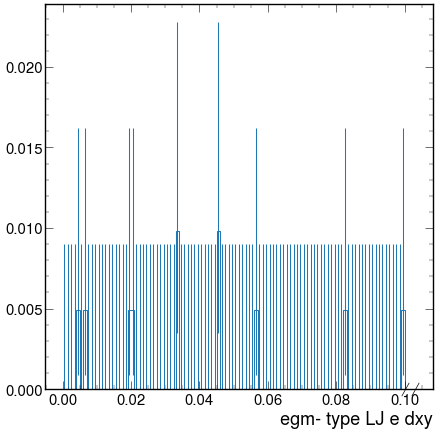

In [14]:
output["out"][samples[-1]]["hists"]["egm_lj_electron_dxy_XXXLowRange"]["baseNoLj",:].plot()
output["out"][samples[-1]]["hists"]["egm_lj_electron_dxy_XXXLowRange"]["baseNoLj",:].integrate

In [15]:
 output["out"][samples[0]]["hists"]["egm_lj_electron_min_dxy_XXXLowRange"]["baseNoLj",:].values()

array([1.16683546, 0.98464536, 0.79631402, 0.49744038, 0.3439094 ,
       0.20061382, 0.16376638, 0.09621275, 0.08393027, 0.06755363,
       0.05731823, 0.0409416 , 0.02251788, 0.03480036, 0.0102354 ,
       0.01432956, 0.01637664, 0.01432956, 0.02251788, 0.01432956,
       0.01432956, 0.01637664, 0.00204708, 0.00409416, 0.00409416,
       0.0102354 , 0.00818832, 0.00204708, 0.00614124, 0.00204708,
       0.        , 0.00204708, 0.00204708, 0.00204708, 0.00409416,
       0.00409416, 0.00614124, 0.00409416, 0.00204708, 0.00204708,
       0.00818832, 0.00614124, 0.00409416, 0.00409416, 0.00614124,
       0.00409416, 0.00818832, 0.00204708, 0.        , 0.        ,
       0.        , 0.00409416, 0.00409416, 0.00409416, 0.00204708,
       0.        , 0.00204708, 0.00409416, 0.        , 0.00204708,
       0.00204708, 0.00204708, 0.        , 0.        , 0.        ,
       0.00204708, 0.00204708, 0.        , 0.00204708, 0.        ,
       0.00204708, 0.00204708, 0.00204708, 0.00204708, 0.     

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7faee7b05760>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

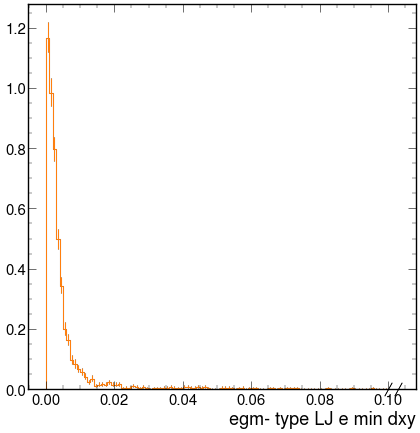

In [16]:
hep.histplot( output["out"][samples[0]]["hists"]["egm_lj_electron_min_dxy_XXXLowRange"]["baseNoLj",:])
output["out"][samples[0]]["hists"]["egm_lj_electron_min_dxy_XXXLowRange"]["baseNoLj",:].plot()


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7faef474a040>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

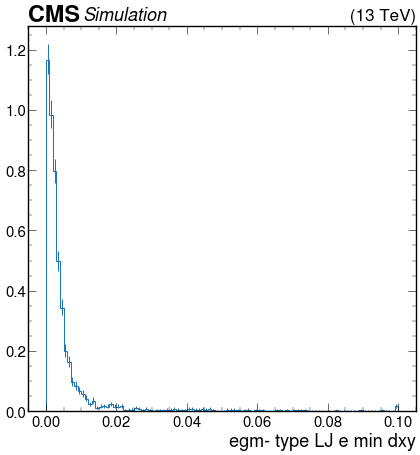

In [17]:
utilities.plot(output["out"][samples[0]]["hists"]["egm_lj_electron_min_dxy_XXXLowRange"]["baseNoLj",:])